<a href="https://colab.research.google.com/github/Jabir-Mahmud-Rifat/Autonomous-Exploration-System-for-Simulated-Volcanic-Terrain-Using-Markov-Decision-Process-MDP-/blob/main/support/Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:


import numpy as np
import random
import matplotlib.pyplot as plt

# Environment settings
GRID_SIZE = 5  # 5x5 grid
NUM_LAVA = 3
NUM_GAS = 2
NUM_CRIERS = 2
MAX_EPISODES = 200  # Increased number of episodes
ALPHA = 0.1         # Learning rate
GAMMA = 0.9         # Discount factor
EPSILON = 1.8       # Higher initial epsilon for more exploration
EPSILON_MIN = 0.05  # Minimum epsilon value
EPSILON_DECAY = 0.980  # Slower decay for more stable learning

# Create grid
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomly place hazards (lava, gas, crater)
def place_hazards():
    global grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))  # Reset grid
    placed = set()

    def get_unique_position():
        while True:
            pos = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
            if pos not in placed and pos != (GRID_SIZE - 1, GRID_SIZE - 1):  # Avoid placing hazards at goal
                placed.add(pos)
                return pos

    for _ in range(NUM_LAVA):
        x, y = get_unique_position()
        grid[x, y] = 1  # Lava
    for _ in range(NUM_GAS):
        x, y = get_unique_position()
        grid[x, y] = 2  # Gas
    for _ in range(NUM_CRIERS):
        x, y = get_unique_position()
        grid[x, y] = 3  # Crater

# Initialize Q-table
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))  # 4 actions: up, down, left, right

# Define reward function
def get_reward(state):
    x, y = state
    if grid[x, y] == 1:  # Lava
        return -100
    elif grid[x, y] == 2:  # Gas
        return -50
    elif grid[x, y] == 3:  # Crater
        return -80
    else:
        return 10  # Small reward for safe tile

# Define possible actions
def get_possible_actions():
    return ['up', 'down', 'left', 'right']

# Define state transition
def move(state, action):
    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, GRID_SIZE - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, GRID_SIZE - 1)
    return (x, y)

# Q-learning algorithm with enhanced exploration and tracking
def q_learning():
    global EPSILON
    place_hazards()
    episodes = 0
    total_rewards = []

    while episodes < MAX_EPISODES:
        state = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
        done = False
        total_reward = 0

        while not done:
            # Epsilon-greedy action selection
            if random.uniform(0, 1) < EPSILON:
                action = random.choice(get_possible_actions())
            else:
                action = get_possible_actions()[np.argmax(Q_table[state[0], state[1]])]

            next_state = move(state, action)
            reward = get_reward(next_state)
            total_reward += reward

            action_index = get_possible_actions().index(action)
            best_next = np.max(Q_table[next_state[0], next_state[1]])

            # Q-value update
            Q_table[state[0], state[1], action_index] = \
                (1 - ALPHA) * Q_table[state[0], state[1], action_index] + \
                ALPHA * (reward + GAMMA * best_next)

            state = next_state

            # End episode if goal reached
            if state == (GRID_SIZE - 1, GRID_SIZE - 1):
                done = True

        episodes += 1
        total_rewards.append(total_reward)

        # Epsilon decay
        if EPSILON > EPSILON_MIN:
            EPSILON *= EPSILON_DECAY
            EPSILON = max(EPSILON, EPSILON_MIN)

        # Logging every 10 episodes
        if episodes % 10 == 0:
            avg_last_10 = np.mean(total_rewards[-10:])
            print(f"Episode {episodes}/{MAX_EPISODES} | Avg Reward (last 10): {avg_last_10:.2f} | Epsilon: {EPSILON:.4f}")

    print("Training complete!")
    return total_rewards


# Run the training
total_rewards = q_learning()



Episode 10/200 | Avg Reward (last 10): -1182.00 | Epsilon: 1.4707
Episode 20/200 | Avg Reward (last 10): -1716.00 | Epsilon: 1.2017
Episode 30/200 | Avg Reward (last 10): -2125.00 | Epsilon: 0.9819
Episode 40/200 | Avg Reward (last 10): -476.00 | Epsilon: 0.8023
Episode 50/200 | Avg Reward (last 10): -1283.00 | Epsilon: 0.6555
Episode 60/200 | Avg Reward (last 10): -895.00 | Epsilon: 0.5356
Episode 70/200 | Avg Reward (last 10): -443.00 | Epsilon: 0.4376
Episode 80/200 | Avg Reward (last 10): 1135.00 | Epsilon: 0.3576
Episode 90/200 | Avg Reward (last 10): 5477.00 | Epsilon: 0.2922
Episode 100/200 | Avg Reward (last 10): 7701.00 | Epsilon: 0.2387
Episode 110/200 | Avg Reward (last 10): 101382.00 | Epsilon: 0.1950
Episode 120/200 | Avg Reward (last 10): 71904.00 | Epsilon: 0.1594
Episode 130/200 | Avg Reward (last 10): 88543.00 | Epsilon: 0.1302
Episode 140/200 | Avg Reward (last 10): 1140241.00 | Epsilon: 0.1064
Episode 150/200 | Avg Reward (last 10): 262328.00 | Epsilon: 0.0869
Episod

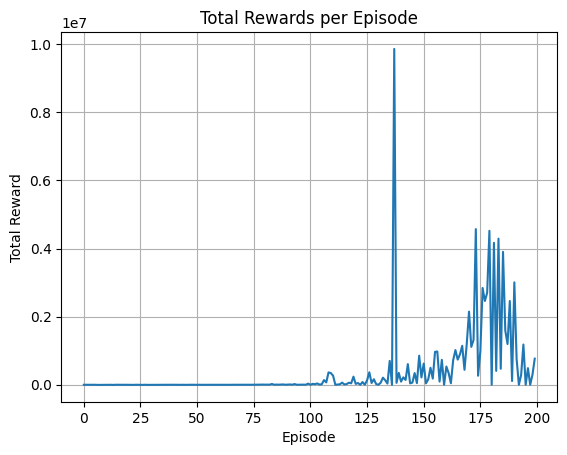

In [10]:
# Plotting the rewards
plt.plot(total_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards per Episode")
plt.grid(True)
plt.show()



=== Testing Trained Agent ===
Starting at position: (0, 0)
Step 1: (0, 0) -> up -> (0, 0) | Reward: 10
Step 2: (0, 0) -> up -> (0, 0) | Reward: 10
Step 3: (0, 0) -> up -> (0, 0) | Reward: 10
Step 4: (0, 0) -> up -> (0, 0) | Reward: 10
Step 5: (0, 0) -> up -> (0, 0) | Reward: 10
Step 6: (0, 0) -> up -> (0, 0) | Reward: 10
Step 7: (0, 0) -> up -> (0, 0) | Reward: 10
Step 8: (0, 0) -> up -> (0, 0) | Reward: 10
Step 9: (0, 0) -> up -> (0, 0) | Reward: 10
Step 10: (0, 0) -> up -> (0, 0) | Reward: 10
Step 11: (0, 0) -> up -> (0, 0) | Reward: 10
Step 12: (0, 0) -> up -> (0, 0) | Reward: 10
Step 13: (0, 0) -> up -> (0, 0) | Reward: 10
Step 14: (0, 0) -> up -> (0, 0) | Reward: 10
Step 15: (0, 0) -> up -> (0, 0) | Reward: 10
Step 16: (0, 0) -> up -> (0, 0) | Reward: 10
Step 17: (0, 0) -> up -> (0, 0) | Reward: 10
Step 18: (0, 0) -> up -> (0, 0) | Reward: 10
Step 19: (0, 0) -> up -> (0, 0) | Reward: 10
Step 20: (0, 0) -> up -> (0, 0) | Reward: 10
Step 21: (0, 0) -> up -> (0, 0) | Reward: 10
Step

<ipython-input-11-c6d55b0e3037>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


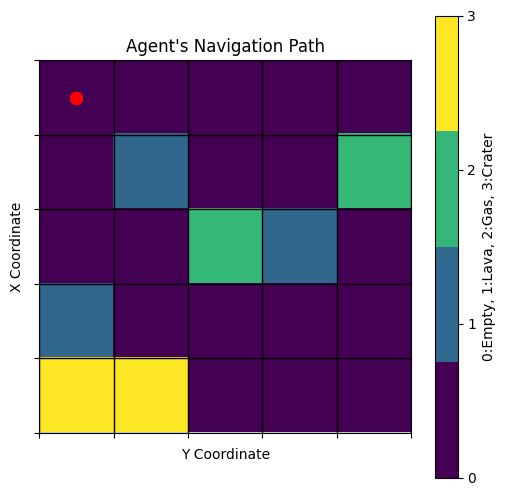


=== Testing Trained Agent ===
Starting at position: (2, 2)
Step 1: (2, 2) -> up -> (1, 2) | Reward: 10
Step 2: (1, 2) -> up -> (0, 2) | Reward: 10
Step 3: (0, 2) -> up -> (0, 2) | Reward: 10
Step 4: (0, 2) -> up -> (0, 2) | Reward: 10
Step 5: (0, 2) -> up -> (0, 2) | Reward: 10
Step 6: (0, 2) -> up -> (0, 2) | Reward: 10
Step 7: (0, 2) -> up -> (0, 2) | Reward: 10
Step 8: (0, 2) -> up -> (0, 2) | Reward: 10
Step 9: (0, 2) -> up -> (0, 2) | Reward: 10
Step 10: (0, 2) -> up -> (0, 2) | Reward: 10
Step 11: (0, 2) -> up -> (0, 2) | Reward: 10
Step 12: (0, 2) -> up -> (0, 2) | Reward: 10
Step 13: (0, 2) -> up -> (0, 2) | Reward: 10
Step 14: (0, 2) -> up -> (0, 2) | Reward: 10
Step 15: (0, 2) -> up -> (0, 2) | Reward: 10
Step 16: (0, 2) -> up -> (0, 2) | Reward: 10
Step 17: (0, 2) -> up -> (0, 2) | Reward: 10
Step 18: (0, 2) -> up -> (0, 2) | Reward: 10
Step 19: (0, 2) -> up -> (0, 2) | Reward: 10
Step 20: (0, 2) -> up -> (0, 2) | Reward: 10
Step 21: (0, 2) -> up -> (0, 2) | Reward: 10
Step

<ipython-input-11-c6d55b0e3037>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


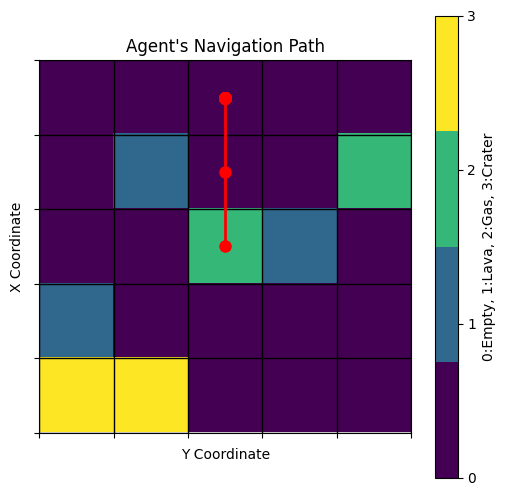


=== Testing Trained Agent ===
Starting at position: (0, 4)
Step 1: (0, 4) -> down -> (1, 4) | Reward: -80
Step 2: (1, 4) -> left -> (1, 3) | Reward: 10
Step 3: (1, 3) -> down -> (2, 3) | Reward: 10
Step 4: (2, 3) -> up -> (1, 3) | Reward: 10
Step 5: (1, 3) -> down -> (2, 3) | Reward: 10
Step 6: (2, 3) -> up -> (1, 3) | Reward: 10
Step 7: (1, 3) -> down -> (2, 3) | Reward: 10
Step 8: (2, 3) -> up -> (1, 3) | Reward: 10
Step 9: (1, 3) -> down -> (2, 3) | Reward: 10
Step 10: (2, 3) -> up -> (1, 3) | Reward: 10
Step 11: (1, 3) -> down -> (2, 3) | Reward: 10
Step 12: (2, 3) -> up -> (1, 3) | Reward: 10
Step 13: (1, 3) -> down -> (2, 3) | Reward: 10
Step 14: (2, 3) -> up -> (1, 3) | Reward: 10
Step 15: (1, 3) -> down -> (2, 3) | Reward: 10
Step 16: (2, 3) -> up -> (1, 3) | Reward: 10
Step 17: (1, 3) -> down -> (2, 3) | Reward: 10
Step 18: (2, 3) -> up -> (1, 3) | Reward: 10
Step 19: (1, 3) -> down -> (2, 3) | Reward: 10
Step 20: (2, 3) -> up -> (1, 3) | Reward: 10
Step 21: (1, 3) -> down ->

<ipython-input-11-c6d55b0e3037>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 4)


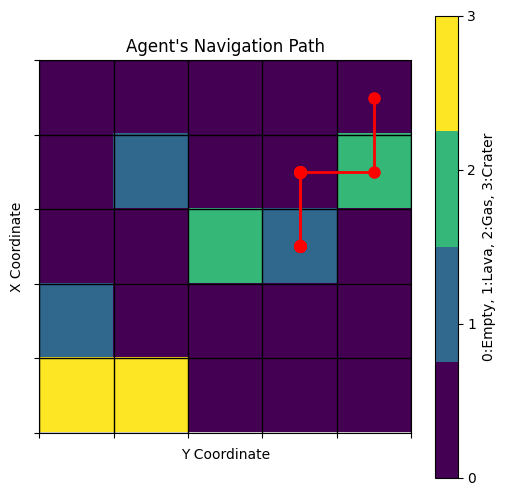

In [11]:
# Methods to Test and Visualize the Trained Agent

def test_agent(start_position=(0,0), max_steps=50):
    """Test the trained agent from a given starting position"""
    state = start_position
    path = [state]
    total_reward = 0

    print("\n=== Testing Trained Agent ===")
    print(f"Starting at position: {state}")

    for step in range(max_steps):
        # Get best action from Q-table
        action_idx = np.argmax(Q_table[state[0], state[1]])
        action = get_possible_actions()[action_idx]

        # Move to next state
        next_state = move(state, action)
        reward = get_reward(next_state)
        total_reward += reward

        print(f"Step {step+1}: {state} -> {action} -> {next_state} | Reward: {reward}")

        # Update state and path
        state = next_state
        path.append(state)

        # Check if reached goal
        if state == (GRID_SIZE-1, GRID_SIZE-1):
            print("\nSUCCESS: Reached the goal!")
            break

    print(f"\nTotal reward: {total_reward}")
    visualize_path(path, grid)

def visualize_path(path, grid):
    """Visualize the agent's path on the grid"""
    plt.figure(figsize=(6,6))

    # Create a color map for the grid
    cmap = plt.cm.get_cmap('viridis', 4)
    plt.imshow(grid.T, cmap=cmap, vmin=0, vmax=3)  # Note: Transposed for correct x,y display

    # Plot the path
    xs, ys = zip(*path)
    plt.plot(ys, xs, 'r-o', linewidth=2, markersize=8)  # Note: y comes first in plotting

    # Add annotations
    plt.colorbar(ticks=[0,1,2,3], label='0:Empty, 1:Lava, 2:Gas, 3:Crater')
    plt.title("Agent's Navigation Path")
    plt.xlabel("Y Coordinate")
    plt.ylabel("X Coordinate")

    # Add grid lines
    plt.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.xticks(np.arange(-0.5, GRID_SIZE, 1), [])
    plt.yticks(np.arange(-0.5, GRID_SIZE, 1), [])

    plt.show()


    # Run the training first
# total_rewards = q_learning()

# Then test the agent from different positions
test_agent(start_position=(0,0))  # Top-left corner
test_agent(start_position=(2,2))  # Center
test_agent(start_position=(0, GRID_SIZE-1))  # Top-right corner

**Result Interpratation:**

 Example of what you might see:

=== Testing Trained Agent ===

Starting at position: (0, 0)

Step 1: (0, 0) -> right -> (0, 1) | Reward: 10

Step 2: (0, 1) -> down -> (1, 1) | Reward: -50  (hit gas)

Step 3: (1, 1) -> right -> (1, 2) | Reward: 10

...

Step 9: (4, 3) -> right -> (4, 4) | Reward: 10


SUCCESS: Reached the goal!

Total reward: 45

*The visualization will show exactly where the agent moved and which hazards it encountered.*